# Darksky Cleaner

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import datetime

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
from wranglingutils import time_marker as tm
from wranglingutils import csv_chunk_importer
from wranglingutils import zip_to_landmark

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

font = {'size'   : 50}
matplotlib.rc('font', **font)

COLOR_BLU = '#0074C8'
COLOR_YEL = '#FACD6B'
COLOR_GRY = '#71C9BE'
COLOR_GRE = '#85B74A'

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25
TICK_FONT_SIZE = LABEL_FONT_SIZE*0.8
FIG_SIZE = (15,6)

In [4]:
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# Load DarkSky Data

In [5]:
weather_df = csv_chunk_importer(file_path_slug='../00_source_data/darksky/*.csv', drop_dups=True)

[20:50:50.931555] Started Loading Data...
[20:50:51.318541] Finished file! (    0 of 66114)
[20:50:54.642159] Finished file! ( 1000 of 66114)
[20:50:57.997514] Finished file! ( 2000 of 66114)
[20:51:01.390776] Finished file! ( 3000 of 66114)
[20:51:04.670194] Finished file! ( 4000 of 66114)
[20:51:07.868466] Finished file! ( 5000 of 66114)
[20:51:11.081591] Finished file! ( 6000 of 66114)
[20:51:14.502586] Finished file! ( 7000 of 66114)
[20:51:17.863758] Finished file! ( 8000 of 66114)
[20:51:21.068072] Finished file! ( 9000 of 66114)
[20:51:24.482757] Finished file! (10000 of 66114)
[20:51:27.685527] Finished file! (11000 of 66114)
[20:51:31.022778] Finished file! (12000 of 66114)
[20:51:34.609807] Finished file! (13000 of 66114)
[20:51:37.971424] Finished file! (14000 of 66114)
[20:51:41.851308] Finished file! (15000 of 66114)
[20:51:46.099576] Finished file! (16000 of 66114)
[20:51:49.984330] Finished file! (17000 of 66114)
[20:51:54.052909] Finished file! (18000 of 66114)
[20:51:5

In [6]:
# trim unnamed old index column
weather = weather_df.iloc[:,1:].copy()

## Encode `precipType`
<p>Change to `is_raining` as either True or False</p>

In [7]:
weather.precipType.fillna(0, inplace=True)
weather.precipType = weather.precipType.apply(lambda x: False if x == 0 else True)
weather.rename(columns={'precipType': 'is_raining'}, inplace=True)

In [8]:
weather.head().transpose()

,0,1,2,3,4
apparentTemperature,53.93,54.72,53.94,53.86,53.78
cloudCover,0.31,NaN,NaN,0.31,0.75
daily_icon,rain,rain,rain,rain,rain
daily_summary,"Heavy rain starting overnight, continuing unti...","Heavy rain starting overnight, continuing unti...","Heavy rain starting overnight, continuing unti...","Heavy rain starting overnight, continuing unti...","Heavy rain starting overnight, continuing unti..."
dewPoint,50.44,50.83,50.07,51.22,51.19
hourly_icon,partly-cloudy-night,clear-night,clear-night,rain,rain
hourly_summary,Partly Cloudy,Clear,Clear,Rain,Rain
humidity,0.88,0.87,0.87,0.91,0.91
latitude,37.7954,37.7954,37.7954,37.7954,37.7954
longitude,-122.394,-122.394,-122.394,-122.394,-122.394


## Assign Region to weather records
<p> we could be picky about stations, but for this anlaysis we will be more general about which region the weather record is in.  assign by longitude coordinate barriers.</p>

In [9]:
def assign_region(df, min_lon, max_lon, region):
    idx = df[(df.longitude < max_lon) & (df.longitude > min_lon)]['region'].index
    df.iloc[idx,-1] = region
    
    return df

In [10]:
weather['region'] = ''

sj_min = -122
sj_max = 0
weather = assign_region(weather, sj_min, sj_max, 'San Jose')

rc_min = -122.27
rc_max = -122.18
weather = assign_region(weather, rc_min, rc_max, 'Redwood City')

pa_min = -122.18
pa_max = -122.12
weather = assign_region(weather, pa_min, pa_max, 'Palo Alto')

mv_min = -122.12
mv_max = -122.0
weather = assign_region(weather, mv_min, mv_max, 'Mountain View')

sf_min = -200
sf_max = -122.27
weather = assign_region(weather, sf_min, sf_max, 'San Francisco')

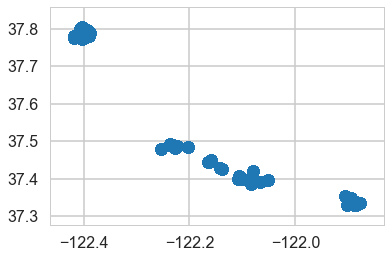

In [11]:
plt.scatter(x=weather.longitude, y=weather.latitude)
plt.show()
plt.close()

In [12]:
weather['time'] = pd.to_datetime(weather['time_corrected'])
weather.drop(['latitude', 'longitude', 'time_corrected'], axis=1, inplace=True)
weather.fillna(0, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586743 entries, 0 to 1586742
Data columns (total 19 columns):
apparentTemperature    1586743 non-null float64
cloudCover             1586743 non-null float64
daily_icon             1586743 non-null object
daily_summary          1586743 non-null object
dewPoint               1586743 non-null float64
hourly_icon            1586743 non-null object
hourly_summary         1586743 non-null object
humidity               1586743 non-null float64
offset                 1586743 non-null int64
precipIntensity        1586743 non-null float64
precipProbability      1586743 non-null float64
is_raining             1586743 non-null bool
pressure               1586743 non-null float64
temperature            1586743 non-null float64
time                   1586743 non-null datetime64[ns]
visibility             1586743 non-null float64
windBearing            1586743 non-null float64
windSpeed              1586743 non-null float64
region                 15

# Write to File by Region and by Station

In [13]:
for region in weather.region.unique():

    # get dataframe on just weather in region
    region_weather = weather[weather.region == region].copy()
    region_weather.reset_index(inplace=True, drop=True)
#     region_weather.to_csv('../00_clean_data/darksky/%s_darksky_cleaned.csv' % region.lower().replace(' ', ''))
    region_weather.to_pickle('../00_clean_data/darksky/%s_darksky_cleaned.pkl' % region.lower().replace(' ', ''))
    
    tm('Finished {}'.format(region))

[20:58:46.073391] Finished San Francisco
[20:58:46.641272] Finished Redwood City
[20:58:47.218965] Finished Mountain View
[20:58:47.895135] Finished San Jose
[20:58:48.285624] Finished Palo Alto


# Regional Temperatures

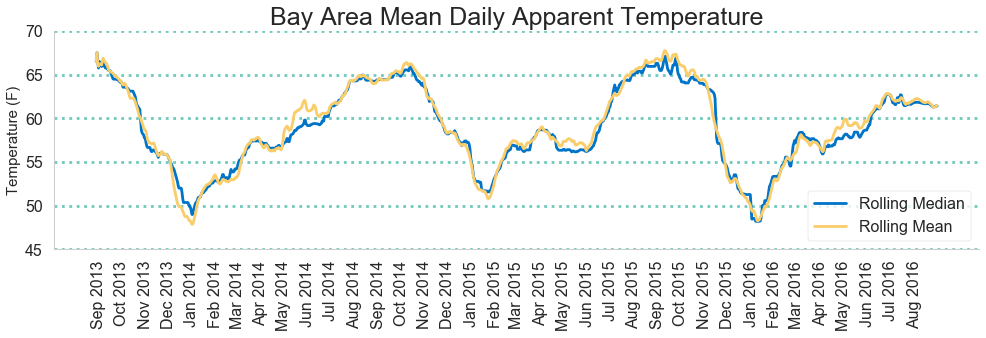

In [14]:
df = weather.copy()
df.sort_values('time', inplace=True)
df.set_index('time', inplace=True)    
df = df.groupby(df.index).mean()

df = df.resample('1D').mean()

plt.subplots(figsize=FIG_SIZE)
ax = df.rolling('30D').median().apparentTemperature.plot(color=COLOR_BLU, label='Rolling Median')
df.rolling('30D').mean().apparentTemperature.plot(color=COLOR_YEL, ax=ax, label='Rolling Mean')

title = 'Bay Area Mean Daily Apparent Temperature'
ax.set_title(title, size=TITLE_FONT_SIZE)
ax.set_ylabel('Temperature (F)', size=LABEL_FONT_SIZE)
ax.set_xlabel('')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([45, 70])
ax.set_yticks([y for y in range(45, 75, 5)])

ax.set_xticks([x for x in df.index if x.day ==1])
ax.set_xticklabels([x.strftime('%b %Y') for x in df.index if x.day ==1], rotation=90)
ax.minorticks_off()

for y in [y for y in range(45, 75, 5)]:
    ax.axhline(y, linestyle=':', color=COLOR_GRY, zorder=-1)

ax.legend(loc=4, frameon=True)
ax.grid(False)

plt.tight_layout()

plt.savefig('../01_charts/bay_area_temperature_trends.png')
plt.show()
plt.close()

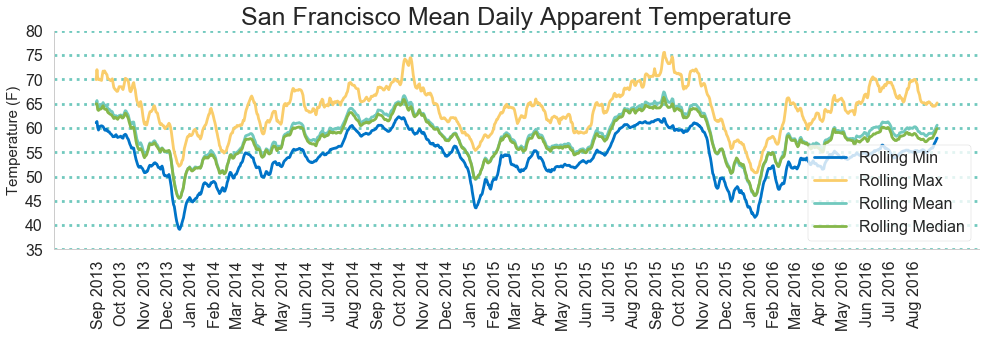

In [15]:
df = weather[weather.region == 'San Francisco'].copy()
df.sort_values('time', inplace=True)
df.set_index('time', inplace=True)    
df = df.groupby(df.index).mean()

df_min = df.resample('1D').min()
df_max = df.resample('1D').max()
df_mean = df.resample('1D').mean()
df_median = df.resample('1D').median()

plt.subplots(figsize=FIG_SIZE)
ax = df_min.rolling('14D').mean().apparentTemperature.plot(color=COLOR_BLU, label='Rolling Min')
df_max.rolling('14D').mean().apparentTemperature.plot(color=COLOR_YEL, ax=ax, label='Rolling Max')
df_mean.rolling('14D').mean().apparentTemperature.plot(color=COLOR_GRY, ax=ax, label='Rolling Mean')
df_median.rolling('14D').mean().apparentTemperature.plot(color=COLOR_GRE, ax=ax, label='Rolling Median')

title = 'San Francisco Mean Daily Apparent Temperature'
ax.set_title(title, size=TITLE_FONT_SIZE)
ax.set_ylabel('Temperature (F)', size=LABEL_FONT_SIZE)
ax.set_xlabel('')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([35, 80])
ax.set_yticks([y for y in range(35, 85, 5)])

ax.set_xticks([x for x in df_mean.index if x.day ==1])
ax.set_xticklabels([x.strftime('%b %Y') for x in df_mean.index if x.day ==1], rotation=90)
ax.minorticks_off()

for y in [y for y in range(35, 85, 5)]:
    ax.axhline(y, linestyle=':', color=COLOR_GRY, zorder=-1)

ax.legend(loc=4, frameon=True)
ax.grid(False)

plt.tight_layout()
plt.savefig('../01_charts/sf_temperature_trends.png')
plt.show()
plt.close()